In [264]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rc('font', family='Batang')
PATH = f"./data/사용자수_2021년 1월-10월.csv"
df = pd.read_csv(PATH, parse_dates=['date_id'])
df

,date_id,활성사용자수,활성사용자수(웰컴 및 Event 수신제외),신규사용자수,재방문사용자수,누적사용자수
0,2021-01-01,1,1,0,1,1331
1,2021-01-02,1,1,0,1,1331
2,2021-01-03,4,4,1,3,1332
3,2021-01-04,49,49,0,49,1332
4,2021-01-05,54,54,2,52,1334
...,...,...,...,...,...,...
292,2021-10-26,302,302,6,296,2804
293,2021-10-27,264,263,6,258,2810
294,2021-10-28,262,262,4,258,2814
295,2021-10-29,195,195,2,193,2816


In [265]:
# df.hist(bins=100)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date_id                  297 non-null    datetime64[ns]
 1   활성사용자수                   297 non-null    int64         
 2   활성사용자수(웰컴 및 Event 수신제외)  297 non-null    int64         
 3   신규사용자수                   297 non-null    int64         
 4   재방문사용자수                  297 non-null    int64         
 5   누적사용자수                   297 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 14.0 KB


In [266]:
users = df.loc[:, ["date_id","활성사용자수"]]
users

,date_id,활성사용자수
0,2021-01-01,1
1,2021-01-02,1
2,2021-01-03,4
3,2021-01-04,49
4,2021-01-05,54
...,...,...
292,2021-10-26,302
293,2021-10-27,264
294,2021-10-28,262
295,2021-10-29,195


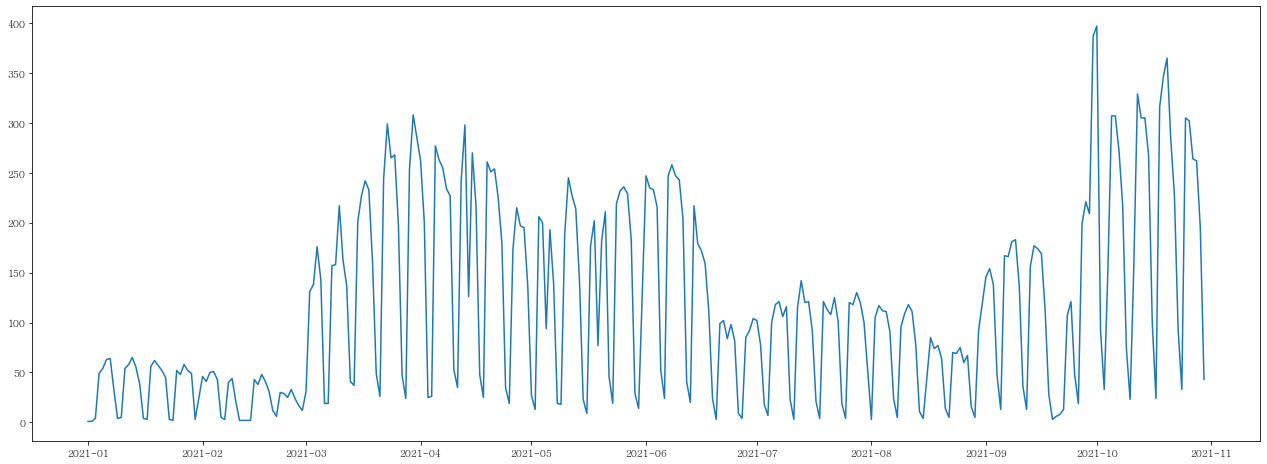

In [267]:
plt.figure(figsize=(22,8))
plt.plot(users["date_id"], users["활성사용자수"]) # 주말 데이터 제거 전 (결측값 존재)

In [268]:
import datetime
def get_days(date): # 요일 구하는 함수
    date = list(map(int, date.split('-')))
    days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    return days[datetime.date(date[0], date[1], date[2]).weekday()]

In [269]:
# for idx, i in enumerate(users['date_id']):
#     if get_days(i) in ["토요일", "일요일"]:
#         users = users.drop(index=idx, axis=0)

print(users)    # 결측값 제거

       date_id  활성사용자수
0   2021-01-01       1
1   2021-01-02       1
2   2021-01-03       4
3   2021-01-04      49
4   2021-01-05      54
..         ...     ...
292 2021-10-26     302
293 2021-10-27     264
294 2021-10-28     262
295 2021-10-29     195
296 2021-10-30      43

[297 rows x 2 columns]


In [270]:
users = users.query("date_id.dt.dayofweek < 5")
users

,date_id,활성사용자수
0,2021-01-01,1
3,2021-01-04,49
4,2021-01-05,54
5,2021-01-06,63
6,2021-01-07,64
...,...,...
291,2021-10-25,305
292,2021-10-26,302
293,2021-10-27,264
294,2021-10-28,262


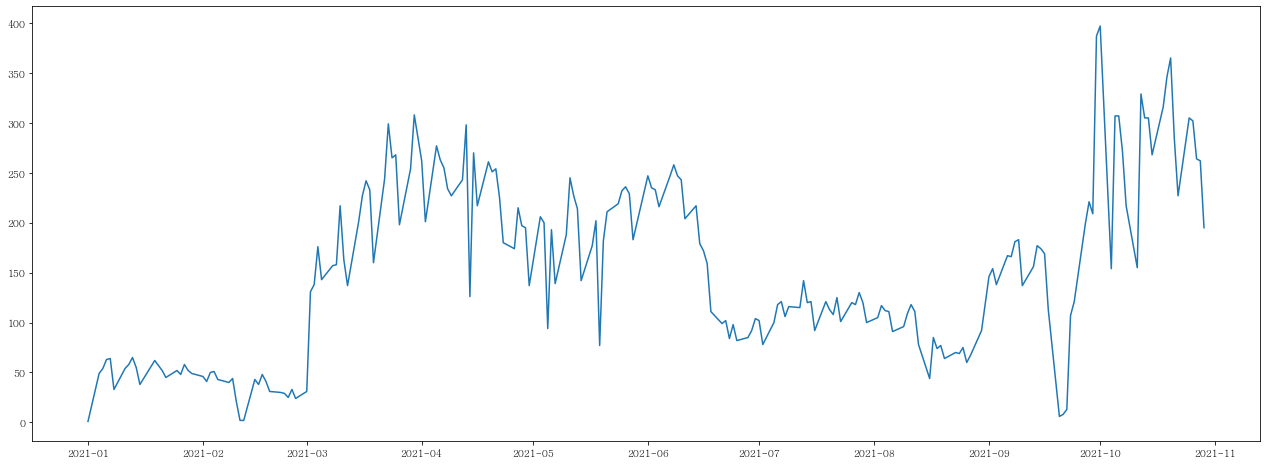

In [271]:
plt.figure(figsize=(22,8))
plt.plot(users['date_id'], users['활성사용자수'])

# 시계열 분해법
## 정의
* 시계열 데이터를 추세/순환/계절/불규칙 요소로 분해하는 기법이다

## 용어
#### 추세
* 데이터가 장기적으로 증가하거나 감소하는것이며 비선형적일 수 있음

#### 순환
* 경기변동과 같이 정치, 경제, 사회적 요인에 의한 변화로, 일정주기가 없으며 장기적인 변화현상이다.

#### 계절성
* 주, 월, 분기, 반기 단위 등 특정 시간의 주기로 나타나는 패턴이다.

#### 불규칙 요소
* 설명될 수 없는 요인 또는 돌발적인 요인에 의하여 일어나는 변화로, 예측 불가능한 임의의 변동을 의미한다.
* 분해법에서는 추세, 훈환 계절성을 뺀 나머지 요소

In [299]:
timeSeries = users.loc[:, ["date_id", "활성사용자수"]]
timeSeries.index = timeSeries.date_id
ts = timeSeries.drop("date_id", axis=1)
ts.rename(columns= {"활성사용자수" : "users"}, inplace= True)
ts.sort_index(inplace=True)
ts

,users
date_id,
2021-01-01,1
2021-01-04,49
2021-01-05,54
2021-01-06,63
2021-01-07,64
...,...
2021-10-25,305
2021-10-26,302
2021-10-27,264


In [302]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['users'], model='additive', period=10)

<Figure size 432x288 with 0 Axes>

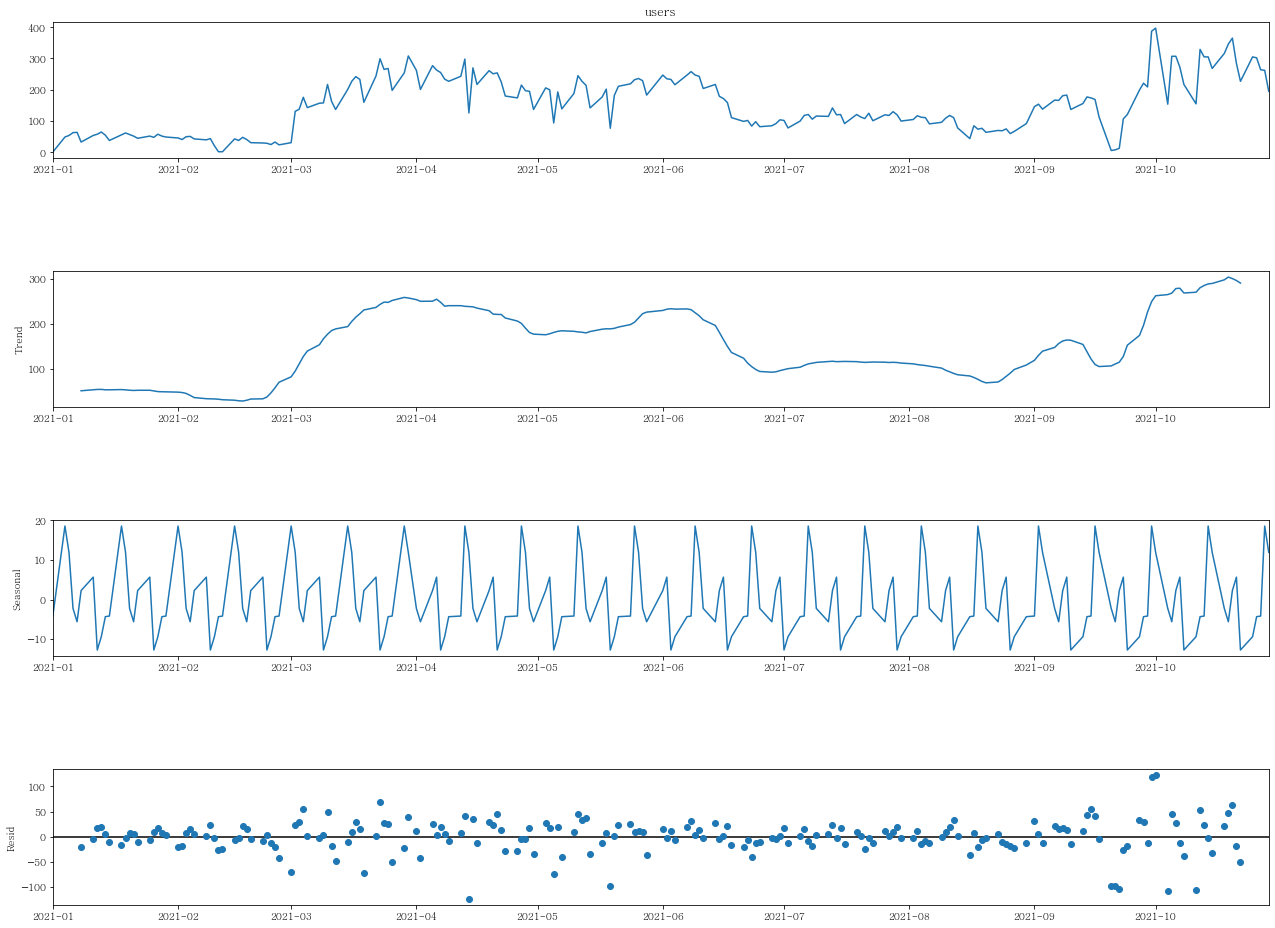

In [303]:
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

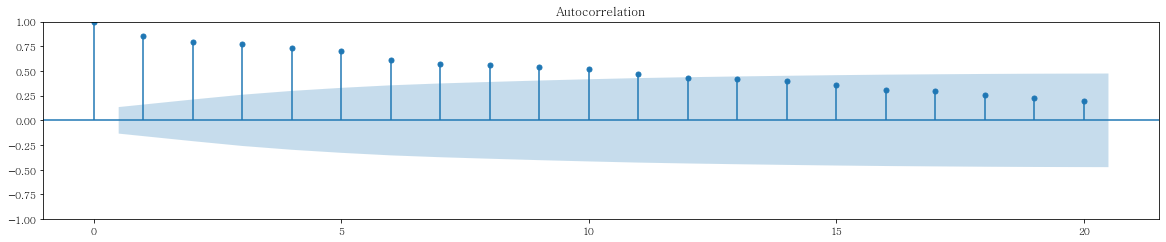

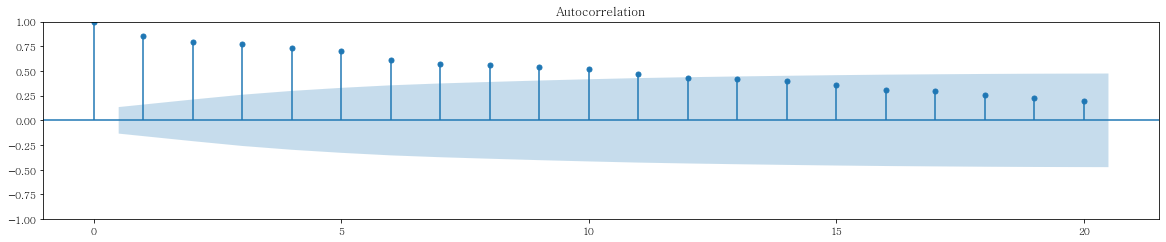

In [304]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)
fig # 정상성 만족?

In [306]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))  # 정상성 만족 x

ADF Statistic: -1.821836
p-value: 0.369676
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


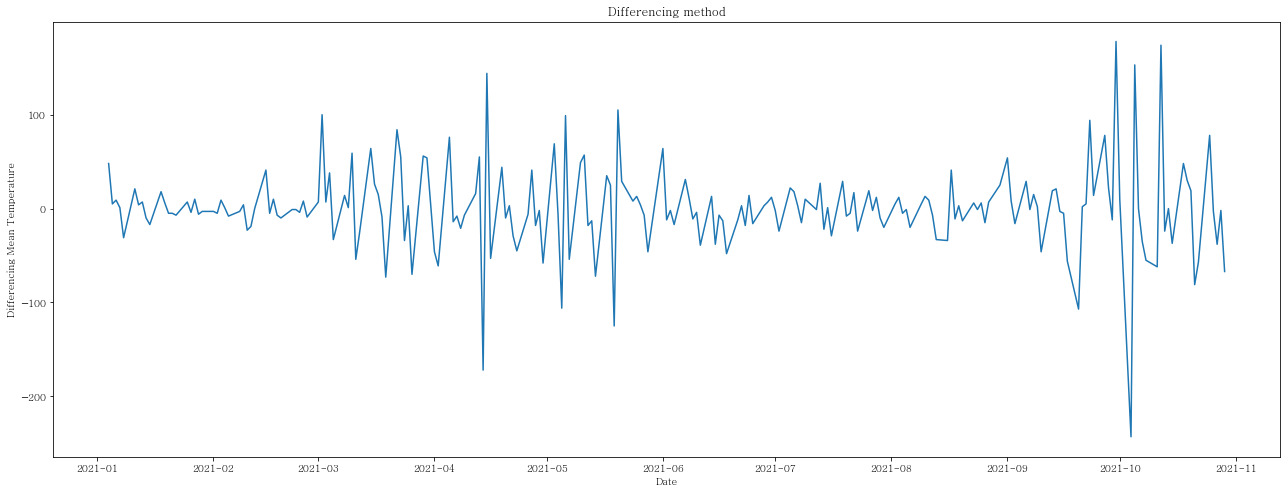

In [307]:
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()  # 1차 차분

In [308]:
result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))  # 정상성 만족 o

ADF Statistic: -5.349224
p-value: 0.000004
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


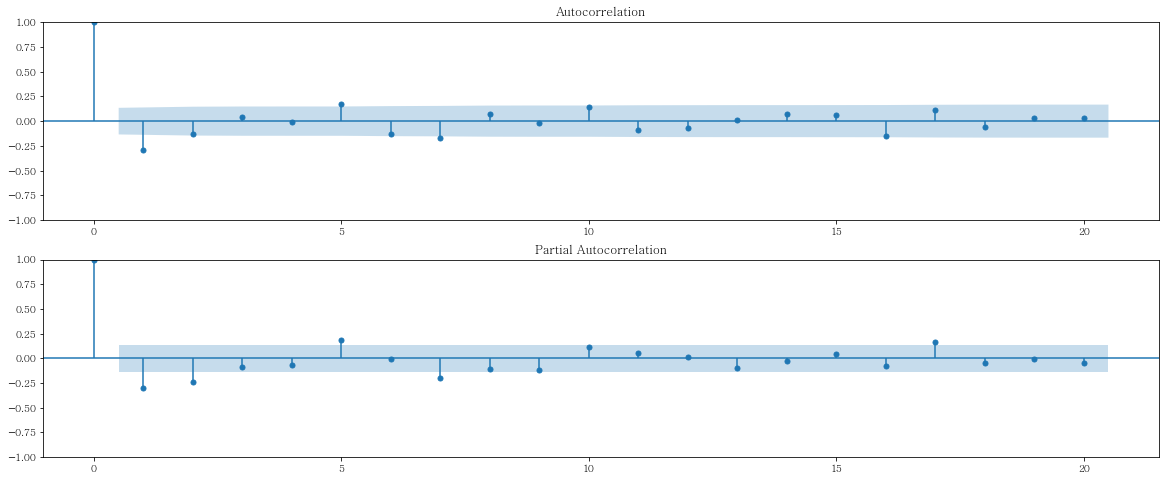

In [309]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)# , lags=40

# ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정


In [310]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(ts, trace=True,
                          suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2205.029, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2231.616, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2213.819, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2202.328, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2229.699, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2202.968, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2202.450, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2203.103, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2200.671, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2201.392, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2200.880, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2211.980, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2201.496, Time=0.17 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.642 seconds


In [313]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(0, 1, 1))
model_fit = model.fit()

start_index = datetime(2021, 1, 1)
end_index = datetime(2021, 10, 29)
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

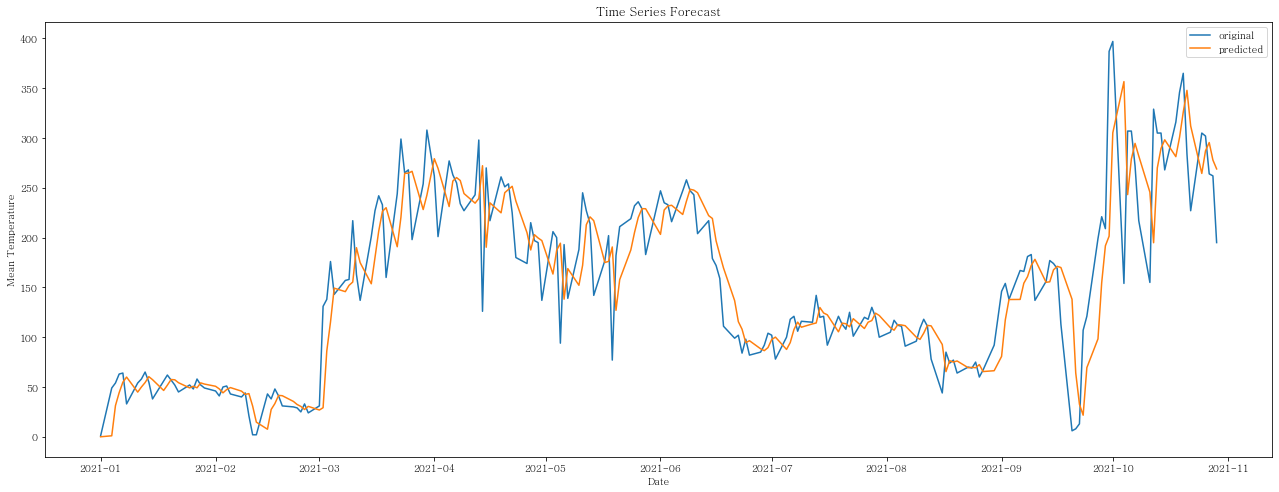

In [318]:
plt.figure(figsize=(22,8))
plt.plot(users['date_id'], users['활성사용자수'],label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

# 예측 시작

In [378]:
pred = model_fit.get_prediction(
    start=pd.to_datetime('2021-09-01'),
    dynamic=False
)
pred_ci = pred.conf_int()

In [377]:
pred_ci.index

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21',
               '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27',
               '2021-10-28', '2021-10-29'],
              dtype='datetime64[ns]', name='date_id', length=213, freq=None)

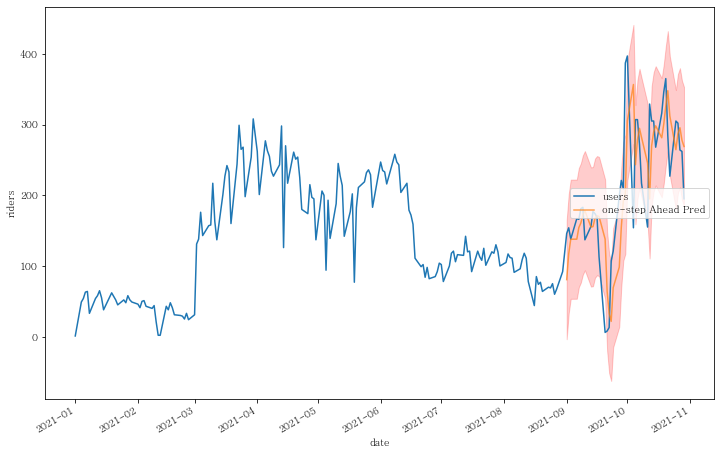

In [380]:
ax = ts['2021-01':].plot(label='Observed', figsize=(12, 8))
pred.predicted_mean.plot(ax=ax,
                         label="one-step Ahead Pred",
                         alpha=.7)
ax.fill_between(
    pred_ci.index,
    pred_ci['lower users'],
    pred_ci['upper users'],
    color='',
    alpha=.2
)

ax.set_xlabel('date')
ax.set_ylabel('riders')
plt.legend(loc=5)
plt.show()

In [353]:
ax = ts['2021-01-01':]
ax

,users
date_id,
2021-01-01,1
2021-01-04,49
2021-01-05,54
2021-01-06,63
2021-01-07,64
...,...
2021-10-25,305
2021-10-26,302
2021-10-27,264
